# Projet MAP473D : Simulation Moléculaire #
### Barthélémy Bulteau - Smail El Hafdi ###

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

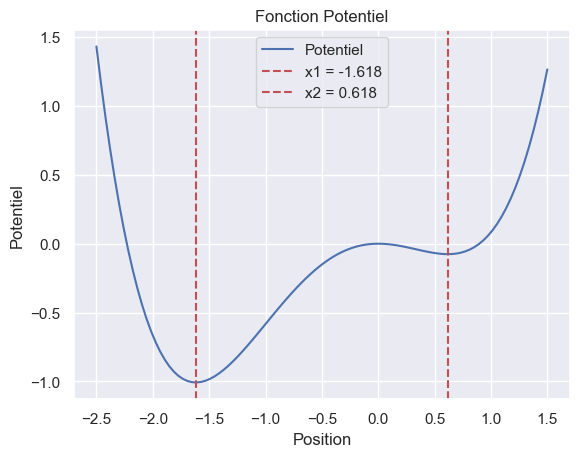

In [35]:
# Fonction potentiel
def V(x):
    return (3*x**4 + 4*x**3 - 6*x**2)/12

# Dérivée
def Vprime(x):
    return x*(x**2 + x - 1)

# Abscisses des minimas
x1 = (-1-np.sqrt(5))/2
x2 = (-1+np.sqrt(5))/2

# représentation graphique
x = np.linspace(-2.5, 1.5, 100)
plt.plot(x, V(x), label='Potentiel')
plt.title("Fonction Potentiel")
# plot vertical line for x1 and x2
plt.axvline(x1, color='r', linestyle='--', label=f'x1 = {round(x1, 3)}')
plt.axvline(x2, color='r', linestyle='--', label=f'x2 = {round(x2, 3)}')
plt.xlabel("Position")
plt.ylabel("Potentiel")
plt.legend()
plt.show()

In [36]:
# Relation de récurrence entre Xn+1 et Xn
def rec(Xn, Gn, epsilon, h):
    return Xn - Vprime(Xn)*h + np.sqrt(2*epsilon*h)*Gn

Proba de R : P(R) = 0.1399


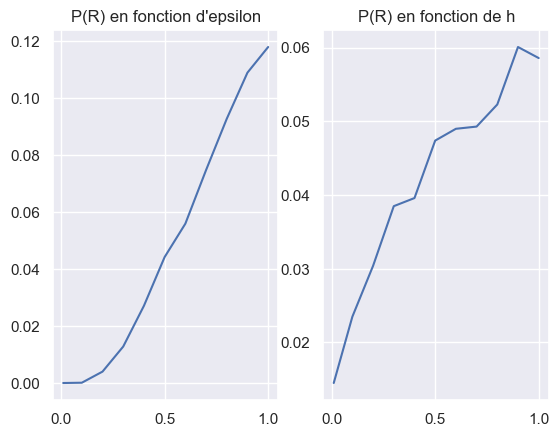

In [37]:
# Calcul de la proba de R={t2 < t1}, P(R) = E(1{t2-t1}) par méthode de Monte-Carlo naïve
def probaR(X0, epsilon, h, N):
    E = 0
    global x1
    global x2
    for _ in range(N):
        Xn = X0
        while Xn >= x1 and Xn <= x2:
            Xn = rec(Xn, np.random.normal(0, 1), epsilon, h)
        if Xn > x2:
            E += 1
    return E/N

# Exemple d'une estimation
print("Proba de R : P(R) = {}".format(probaR(x1+0.1, 1, 1, 10000)))

# Variations en fonction d'epsilon
epsilons = [0.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
plt.subplot(1, 2, 1)
plt.plot(epsilons, [probaR(x1+0.1, e, 0.5, 10000) for e in epsilons])
plt.title("P(R) en fonction d'epsilon")

# Variations en fonction de h
hs = [0.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
plt.subplot(1, 2, 2)
plt.plot(hs, [probaR(x1+0.1, 0.5, h, 10000) for h in hs])
plt.title("P(R) en fonction de h")

plt.show()

In [57]:
def simulation_trajectoire(X0, h, sigma):
    # simulation d'une trajectoire
    Xn = X0
    traj = []
    while Xn >= x1 and Xn <= x2:
        traj.append(Xn)
        Xn = Xn - Vprime(Xn)*h + sigma*np.random.randn()
    return np.array(traj)

def K(trajectoires):
    # retourne le plus petit maximum des trajectoires
    return np.amin([np.amax(traj) for traj in trajectoires])

def I(trajectoires, K_value):
    # retourne les indices des trajectoires dont le maximum est K_value
    return [i for i, traj in enumerate(trajectoires) if np.amax(traj) == K_value]

def estimateur_AMS(X0, M, h, epsilon):
    # variables
    global x2
    trajectoires = []
    I_q = []
    K_q = 0
    sigma = np.sqrt(2*epsilon*h)
    p_estim = 1

    # simulation initiale
    trajectoires = [simulation_trajectoire(X0, h, sigma) for _ in range(M)]
    K_q = K(trajectoires)
    I_q = I(trajectoires, K_q)
    p_estim *= 1 - len(I_q)/M

    q = 0
    while K_q < x2:
        print("Iteration n°{} \t K_q/x2 = {}".format(q, K_q/x2))

        # (i) Branchement
        indices = list(set(range(M)) - set(I_q))
        for m in I_q:
            p = np.random.choice(indices)
            idx = np.where(trajectoires[p] > K_q)[0][0]
            trajectoires[m] = np.concatenate((trajectoires[p][:idx], simulation_trajectoire(trajectoires[p][idx], h, sigma)))

        # (ii) Calcul du niveau
        K_q = K(trajectoires)
        I_q = I(trajectoires, K_q)
        p_estim *= 1 - len(I_q)/M

        q += 1

    return p_estim



In [58]:
estimateur_AMS(x1+0.1, 100, 0.1, 0.1)

Iteration n°0 	 K_q/x2 = -2.456230589874905
Iteration n°1 	 K_q/x2 = -2.4472783650813104
Iteration n°2 	 K_q/x2 = -2.447263716830043
Iteration n°3 	 K_q/x2 = -2.4335925062490738
Iteration n°4 	 K_q/x2 = -2.418687470124864
Iteration n°5 	 K_q/x2 = -2.418359429350381
Iteration n°6 	 K_q/x2 = -2.400311585052895
Iteration n°7 	 K_q/x2 = -2.398589538625908
Iteration n°8 	 K_q/x2 = -2.3985159150263144
Iteration n°9 	 K_q/x2 = -2.3968881711059002
Iteration n°10 	 K_q/x2 = -2.39680549643467
Iteration n°11 	 K_q/x2 = -2.375414365919119
Iteration n°12 	 K_q/x2 = -2.367659409562459
Iteration n°13 	 K_q/x2 = -2.3656425687105482
Iteration n°14 	 K_q/x2 = -2.36449241828515
Iteration n°15 	 K_q/x2 = -2.36226757400278
Iteration n°16 	 K_q/x2 = -2.3603036277963927
Iteration n°17 	 K_q/x2 = -2.3499988066197504
Iteration n°18 	 K_q/x2 = -2.341217562214822
Iteration n°19 	 K_q/x2 = -2.3375538472551254
Iteration n°20 	 K_q/x2 = -2.3358993093581084
Iteration n°21 	 K_q/x2 = -2.3338244367760566
Iteration n°2

ValueError: 'a' cannot be empty unless no samples are taken